In [27]:
import confluent_kafka
import time
from pykafka import KafkaClient
import pandas as pd
import seaborn as sns
#%pylab inline
from datetime import timezone, datetime

In [28]:
write_readings={}
 
documents_number = 20000 * 200000
j=0
itr=0
MAX_ITR=60
total_docs=0
msg_size=100

msg_payload = ('kafkatest' * 20).encode()[:msg_size]
print(msg_payload)
print(len(msg_payload))
topic = 'confluent-kafka-topic'
bootstrap_servers = 'localhost:9092'

producer_timings = {}
producer_messages={}
topic = 'confluent-kafka-topic'
conf = {'bootstrap.servers': bootstrap_servers}
producer = confluent_kafka.Producer(**conf)

b'kafkatestkafkatestkafkatestkafkatestkafkatestkafkatestkafkatestkafkatestkafkatestkafkatestkafkatestk'
100


In [29]:
startf = datetime.now();
while itr<MAX_ITR: 
    start = datetime.now();
    messages_to_retry=0
    for index in range(documents_number):
        try:
            producer.produce(topic, value=msg_payload)
            #calculate the time for the insert
            timec=int((datetime.now() - start).total_seconds())

            if timec==1:
                #print (timec, 'secs for',index)
                write_readings[j]=index
                j=j+1
                #f.write("%d,%d\n" %(j, index))
                itr=itr+1
                total_docs=total_docs + index
                break
        except BufferError as e:
            producer.flush()
            messages_to_retry += 1
            #print(messages_to_retry)
    #retry messages that over filled the local buffer
    #print(messages_to_retry)
    for i in range(messages_to_retry):
        producer.poll(0)
        try:
            producer.produce(topic, value=msg_payload)
        except BufferError as e:
            producer.poll(0)
            producer.produce(topic, value=msg_payload)

producer.flush()
print ('inserted ',total_docs, ' in ', (datetime.now() - startf).total_seconds(), 's')
print ('average inserts per second is :',total_docs/MAX_ITR)


inserted  3039693  in  62.052508 s
average inserts per second is : 50661.55


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f63c45011d0>],
      dtype=object)

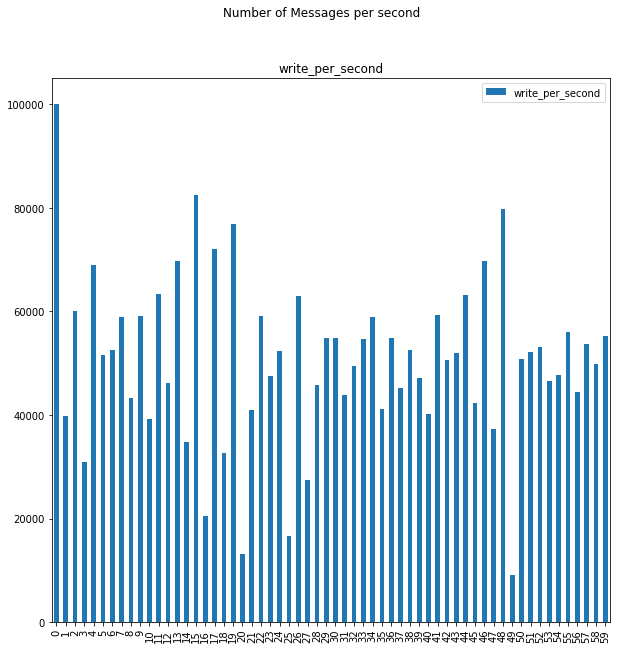

In [30]:

producer_df1 = pd.DataFrame.from_dict(write_readings, orient='index').rename(columns={0: 'write_per_second'})

producer_df1.sort_index(inplace=True)
producer_df1
producer_df1.plot(kind='bar', subplots=True, figsize=(10, 10), title="Number of Messages per second")